# Compare $\Delta\Delta$G values to prior studies
Copyright 2023 John Shin under GPL-3.0

Supporting Figures come from this document.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as scipy

In [2]:
data_path='Data/'

In [3]:
ddG_GAAA = pd.read_csv(data_path+'ddGs/avg_ddG_GAAA.csv').rename(columns={'Unnamed: 0':'sequence'}).set_index('sequence')
ddG_GAAA.loc['UAUGG_CCUAAG',['ddG','ddG_lb','ddG_ub','limit']] = 0
ddG_GAAA['limit'] = ddG_GAAA['limit'].astype(bool)
ddG_GAAA.head()

,first_loc,first_res,second_loc,second_res,ddG,ddG_lb,ddG_ub,limit
sequence,,,,,,,,
UAUGG_CCUAAG,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,False
AAUGG_CCUAAG,7.0,A,NaN,NaN,2.269253,1.848655,2.441301,False
CAUGG_CCUAAG,7.0,C,NaN,NaN,2.317993,2.111339,2.492009,False
GAUGG_CCUAAG,7.0,G,NaN,NaN,0.306750,-0.175082,0.483862,False
UAAGG_CCUAAG,9.0,A,NaN,NaN,1.440634,1.088564,1.618814,False


In [4]:
ddG_GUAA = pd.read_csv(data_path+'ddGs/avg_ddG_GUAA.csv').rename(columns={'Unnamed: 0':'sequence'}).set_index('sequence')
ddG_GUAA.loc['UAUGG_CCUAAG',['ddG','ddG_lb','ddG_ub','limit']] = 0
ddG_GUAA['limit'] = ddG_GUAA['limit'].astype(bool)
ddG_GUAA.head()

,first_loc,first_res,second_loc,second_res,ddG,ddG_lb,ddG_ub,ddG_GAAA,ddG_GAAA_lb,ddG_GAAA_ub,limit
sequence,,,,,,,,,,,
UAUGG_CCUAAG,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,False
AAUGG_CCUAAG,7.0,A,NaN,NaN,0.197199,-0.071197,0.493810,3.727312,3.288548,3.969202,False
CAUGG_CCUAAG,7.0,C,NaN,NaN,0.707758,0.448652,1.053749,4.355107,4.198651,4.520037,True
GAUGG_CCUAAG,7.0,G,NaN,NaN,0.201915,-0.058468,0.474289,3.625810,3.257729,3.869693,False
UAAGG_CCUAAG,9.0,A,NaN,NaN,0.181294,-0.124077,0.479479,3.601832,3.204249,3.885033,False


## Comparison to our prior results

In [5]:
prior_data = pd.read_csv(data_path+'prior_ddGs.csv').rename(columns={'Unnamed: 0':'sequence'}).set_index('sequence')
prior_data.head()

,dG_30mM_Mg_GAAA_13854,dG_30mM_Mg_GAAA_35600,dG_30mM_Mg_GAAA_35311_A,dG_30mM_Mg_GAAA_14073,dG_30mM_Mg_GAAA_14007,dG_5mM_Mg_GAAA_13854,dG_5mM_Mg_GAAA_35600,dG_5mM_Mg_GAAA_35311_A,dG_5mM_Mg_GAAA_14073,dG_5mM_Mg_GAAA_14007,dG_5Mg150K_GAAA_13854,dG_5Mg150K_GAAA_35600,dG_5Mg150K_GAAA_35311_A,dG_5Mg150K_GAAA_14073,dG_5Mg150K_GAAA_14007,dG_30mM_Mg_GUAA_13854,dG_30mM_Mg_GUAA_35600,dG_30mM_Mg_GUAA_35311_A,dG_30mM_Mg_GUAA_14073,dG_30mM_Mg_GUAA_14007
sequence,,,,,,,,,,,,,,,,,,,,
AAAGG_CCCUAAC,-7.919273,NaN,-7.375415,-7.204924,-7.151179,-5.721879,NaN,-6.099359,-5.260247,-4.998410,-5.948720,NaN,-6.642710,-5.197019,-5.972358,-8.095903,NaN,-7.360824,-7.887782,-7.911937
AAAGG_CCUAAG,-8.642323,-9.219824,-8.001717,-8.540209,NaN,-6.620076,-6.771282,-6.088996,-4.962859,NaN,-6.416898,-6.643006,-6.088965,-5.492356,NaN,-8.386309,-8.491568,-7.926026,-8.583352,NaN
AAAGG_CCUACG,-8.411889,NaN,-7.967532,-8.132191,-7.825111,-6.060576,NaN,-5.779809,-4.962856,-5.507661,-5.535198,NaN,-6.898039,-5.735796,-5.743628,-8.411430,NaN,-7.917811,-8.417586,-8.394674
AAAGG_CCUGCC,-10.515583,-10.787623,-9.775419,-9.690978,-9.360476,-8.714827,-8.563667,-7.430423,-7.480752,-7.428569,-7.767472,-8.010444,-6.762361,-6.469642,-6.436936,-8.878108,-8.967280,-8.022711,-8.331932,-8.112934
AACAAGAA_UUCUAACAAU,-7.120596,NaN,-7.096903,-6.268862,-6.223181,-4.986231,NaN,-6.806107,-5.771237,-6.404174,-6.780266,NaN,-7.048044,-5.449379,-6.665727,-7.699352,NaN,-7.044043,-7.104858,-6.475954


In [6]:
GAAA_prior_data = prior_data[[col for col in prior_data.columns if '30mM_Mg_GAAA' in col]]
GAAA_prior_data[GAAA_prior_data>-7.1] = -7.1
GAAA_prior_data = (GAAA_prior_data - GAAA_prior_data.loc['UAUGG_CCUAAG'].values).mean(axis=1)
GAAA_prior_data.name = 'prior_ddG'
GAAA_prior_data.head()

C:\Users\jshin\AppData\Local\Temp\ipykernel_3228\2498564537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GAAA_prior_data[GAAA_prior_data>-7.1] = -7.1
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


sequence
AAAGG_CCCUAAC          4.065625
AAAGG_CCUAAG           3.155127
AAAGG_CCUACG           3.394142
AAAGG_CCUGCC           1.558750
AACAAGAA_UUCUAACAAU    4.373174
Name: prior_ddG, dtype: float64

In [7]:
GUAA_prior_data = prior_data[[col for col in prior_data.columns if '30mM_Mg_GUAA' in col]]
GUAA_prior_data[GUAA_prior_data>-7.1] = -7.1
GUAA_prior_data = (GUAA_prior_data - GUAA_prior_data.loc['UAUGG_CCUAAG'].values).mean(axis=1)
GUAA_prior_data.name = 'prior_ddG'
GUAA_prior_data.head()

C:\Users\jshin\AppData\Local\Temp\ipykernel_3228\3653210011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GUAA_prior_data[GUAA_prior_data>-7.1] = -7.1


sequence
AAAGG_CCCUAAC          0.158269
AAAGG_CCUAAG          -0.155636
AAAGG_CCUACG          -0.312995
AAAGG_CCUGCC          -0.341122
AACAAGAA_UUCUAACAAU    0.721328
Name: prior_ddG, dtype: float64

In [8]:
def ztransform(x):
    return (x-np.mean(x))/np.std(x)

In [9]:
sigma = scipy.stats.norm.ppf(1-0.05/529/2)

In [10]:
plot_data = ddG_GAAA.merge(GAAA_prior_data,left_index=True,right_index=True)
plot_data = plot_data[(~plot_data['ddG'].isna()) & (~plot_data['prior_ddG'].isna())]
plot_data.query('not limit & ((prior_ddG < ddG_lb) | (prior_ddG > ddG_ub))')

,first_loc,first_res,second_loc,second_res,ddG,ddG_lb,ddG_ub,limit,prior_ddG
sequence,,,,,,,,,
UAUGG_CCUCCG,4.0,C,5.0,C,2.231518,1.768359,2.640516,False,1.71123


RMSD 0.09262334740124044
rho 0.996575743628756


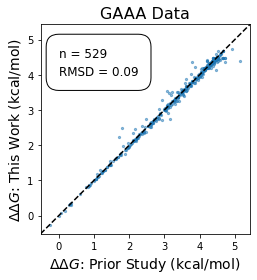

In [11]:
fig,ax = plt.subplots()

plt.scatter(plot_data['prior_ddG'],plot_data['ddG'],s=5,alpha=0.5)
ax.set_aspect(1)

lims = np.array([max(i*j,i*k) for i,j,k in zip([-1,1],ax.get_xlim(),ax.get_ylim())])*np.array([-1,1])

plt.plot(lims,lims,'k--')


RMSD = np.sqrt(np.mean((plot_data['prior_ddG']-plot_data['ddG'])**2))

print('RMSD',RMSD)
print('rho',np.corrcoef(plot_data['prior_ddG'],plot_data['ddG'])[0,1])
ax.text(0,4,f"n = {len(plot_data)}\nRMSD = {RMSD:.2f}",linespacing=1.5,fontsize=12,
           bbox = {'boxstyle':'round','facecolor':'white','pad':1.05})

ax.set_ylim(lims)
ax.set_xlim(lims)


# ax.legend(loc='lower right',framealpha=1,fontsize=8)

ax.set_title('GAAA Data',fontsize=16)

ax.set_ylabel(r'$\Delta\Delta G$: This Work (kcal/mol)',fontsize=14)
ax.set_xlabel(r'$\Delta\Delta G$: Prior Study (kcal/mol)',fontsize=14)

plt.tight_layout()
plt.savefig('Figures/Supplement/prior_comparison_GAAA.png',dpi=600,facecolor='white')

plt.show()

In [12]:
plot_data = ddG_GUAA[['first_loc','first_res','second_loc','second_res','ddG','ddG_lb','ddG_ub','limit']].merge(
                    GUAA_prior_data,left_index=True,right_index=True)
plot_data = plot_data[(~plot_data['ddG'].isna()) & (~plot_data['prior_ddG'].isna())]
plot_data.query('not limit & ((prior_ddG < ddG_lb) | (prior_ddG > ddG_ub))')

,first_loc,first_res,second_loc,second_res,ddG,ddG_lb,ddG_ub,limit,prior_ddG
sequence,,,,,,,,,
UGUGG_CCUGAG,8.0,G,4.0,G,0.482242,0.231591,0.749182,False,0.806436


RMSD 0.06071381590729138
rho 0.9862407201023856


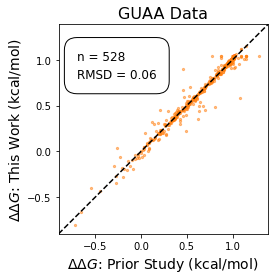

In [14]:
fig,ax = plt.subplots()


plt.scatter(plot_data['prior_ddG'],plot_data['ddG'],s=5,alpha=0.5,color='tab:orange')
ax.set_aspect(1)

lims = np.array([max(i*j,i*k) for i,j,k in zip([-1,1],ax.get_xlim(),ax.get_ylim())])*np.array([-1,1])

plt.plot(lims,lims,'k--')

RMSD = np.sqrt(np.mean((plot_data['prior_ddG']-plot_data['ddG'])**2))

print('RMSD',RMSD)
print('rho',np.corrcoef(plot_data['prior_ddG'],plot_data['ddG'])[0,1])

ax.text(-.7,0.8,f"n = {len(plot_data)}\nRMSD = {RMSD:.2f}",linespacing=1.5,fontsize=12,
           bbox = {'boxstyle':'round','facecolor':'white','pad':1.05})
ax.set_ylim(lims)
ax.set_xlim(lims)



ax.set_title('GUAA Data',fontsize=16)

ax.set_ylabel(r'$\Delta\Delta G$: This Work (kcal/mol)',fontsize=14)
ax.set_xlabel(r'$\Delta\Delta G$: Prior Study (kcal/mol)',fontsize=14)

plt.tight_layout()
plt.savefig('Figures/Supplement/prior_comparison_GUAA.png',dpi=600,facecolor='white')

plt.show()

## Comparison to Geary et al

In [15]:
lit = np.array([1.78,2.04,3.78,4.09,4.96,5.65,5.65,.24,1.49,5.65,5.65,5.65,4.18,4.33,4.41])
our = np.array([0.82,1.37,np.NaN,3.08,4.16,4.48,np.NaN,0.08,0.32,3.68,4.02,4.40,2.27,2.32,np.NaN])
limit = np.array(['k','k','k','k','k','gray','gray','k','k','gray','gray','gray','k','k','k'])=='gray'
mask = ~np.isnan(our)

In [16]:
bhat = np.mean(our[mask &~ limit]-lit[mask &~ limit])
print(bhat,np.sqrt(np.mean((our[mask &~ limit] - bhat- lit[mask &~ limit])**2)))

-1.08625 0.5781206080914257


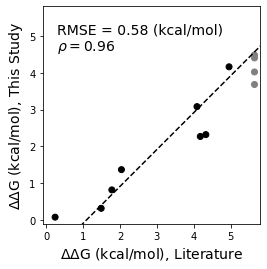

In [17]:
fig,ax = plt.subplots(figsize=(4,4))
plt.scatter(lit,our,
           c = ['k','k','k','k','k','gray','gray','k','k','gray','gray','gray','k','k','k'])

# plt.plot([0,5.8],[0,5.8],'k--')

# plt.plot(np.linspace(0,6),beta[1]+beta[0]*np.linspace(0,6),'--',color='gray')
plt.plot(np.linspace(0,6),bhat+np.linspace(0,6),'k--')

plt.ylim([-0.1,5.8])
ax.set_aspect(1)
plt.ylabel('$\Delta\Delta$G (kcal/mol), This Study',fontsize=14)
plt.xlabel('$\Delta\Delta$G (kcal/mol), Literature',fontsize=14)
plt.xlim([-0.1,5.8])
plt.text(.3,4.6,(fr"RMSE = {np.sqrt(np.mean((our[mask &~ limit] - bhat- lit[mask &~ limit])**2)):.2f} (kcal/mol)"
               '\n'
               fr"$\rho=${np.corrcoef(lit[mask],our[mask])[0,1]:.2f}"),fontsize=14)

plt.savefig('Figures/Supplement/Comparison_to_literature.png',facecolor='white',dpi=600)
plt.show()

## Isostericity

In [18]:
sequence_11ntRwt = 'UAUGG_CCUAAG'
mutation_dict_11ntR = {
    0:7, 1:8, 2:9, 3:10, 4:11, 5:1, 6:2, 7:3, 8:4, 9:5, 10:6, 
}

WC_pairs =['AU','UA','GC','CG']
wobble_pairs = ['GU','UG']
RR_mismatches = ['AA','GG','AG','GA']
RY_mismatches = ['AC','CA']
YY_mismatches = ['UU','CC','UC','CU']
base_pairs = WC_pairs+wobble_pairs+RY_mismatches+RR_mismatches+YY_mismatches
base_pair_names = ['WC pair','Wobble pair','Mixed mismatch','RR mismatch','YY mismatch']
base_pair_colors=['tab:blue','tab:green','tab:olive','tab:red','tab:purple']

In [19]:
def revDict(d):
    return {v: k for k, v in d.items()}

def assignBP(bases_s):
    out = pd.Series(index=bases_s.index,dtype=str)
    for bases in bases_s.iteritems():
        if bases[1] in WC_pairs:
            out.loc[bases[0]] = 'WC pair'
        elif bases[1] in wobble_pairs:
            out.loc[bases[0]] = 'Wobble pair'
        elif bases[1] in RR_mismatches:
            out.loc[bases[0]] = 'RR mismatch'
        elif bases[1] in RY_mismatches:
            out.loc[bases[0]] = 'Mixed mismatch'
        elif bases[1] in YY_mismatches:
            out.loc[bases[0]] = 'YY mismatch'
        else:
            out.loc[bases[0]] = np.NaN
    return out

In [20]:
# Isostericity values from Stombaugh et al 2009 10.1093/nar/gkp011

isostericities = {
    '11_1':{k[::-1]:v for k,v in \
            zip(['CC','UU','CA','UG','UA','AU','GC','CG','GU','AC','UU','CC','UC','CU','AA','GA','AG','AA'],
                [5.49,3.80,2.55,2.14,0.21,0.34,0.26,0.00,2.39,2.78,3.94,5.56,3.44,3.39,4.50,3.50,3.49,4.38])},
    '10_2':{k[::-1]:v for k,v in \
            zip(['CC','UU','CA','UG','UA','AU','GC','CG','GU','AC','UU','CC','UC','CU','AA','GA','AG','AA'],
                [5.49,3.80,2.55,2.14,0.21,0.34,0.26,0.00,2.39,2.78,3.94,5.56,3.44,3.39,4.50,3.50,3.49,4.38])},
    '8_3':{k[::-1]:v for k,v in \
            zip(['AA','AG','GU','UU','CA','CG','CC','UA','GG','UG'],
                [4.27,3.78,4.20,2.44,2.64,3.11,1.69,0.00,2.26,2.82])},
    '4_5':{k[::-1]:v for k,v in \
            zip(['AG','CC','GA','GG','CU','UU','UG','UC','AC','CA','AA','AU','CG','UA'],
                [4.13,3.08,2.36,2.06,1.49,1.57,1.44,1.22,0.67,0.66,0.00,2.04,3.87,5.17])},
    '7_6':{k[::-1]:v for k,v in \
            zip(['CC','UU','CA','UG','UA','AU','GC','CG','GU','AC','UU','CC','UC','CU','AA','GA','AG','AA'],
                [6.25,5.27,4.76,4.48,2.40,2.11,2.14,2.39,0.00,0.80,2.89,5.06,3.80,4.59,4.10,4.33,4.44,6.07])}
}

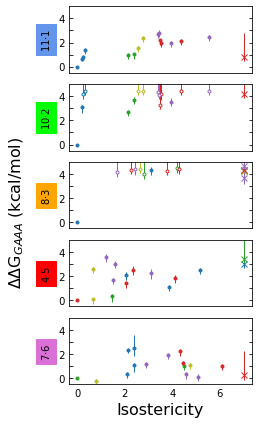

In [22]:
fig,axs = plt.subplots(nrows=5,figsize=(5,6),sharex=True,sharey=True,facecolor='w')

res1s = [11,10,8,4,7]
res2s = [1,2,3,5,6]

for res1,res2,ax,color,iso in zip(res1s,res2s,axs,
                       ['cornflowerblue','lime','orange','red','orchid'],
                                 isostericities.values()):
    nuc1 = sequence_11ntRwt.replace('_','')[revDict(mutation_dict_11ntR)[res1]]
    nuc2 = sequence_11ntRwt.replace('_','')[revDict(mutation_dict_11ntR)[res2]] 
    
    iso = pd.DataFrame(iso,index=['isostericity']).T

    curr_data = pd.DataFrame({
                    f'{res1}_mut':nuc1,
                    f'{res2}_mut':nuc2,
                    'ddG':0,
                    'ddG_lb':0,
                    'ddG_ub':0,
                    'limit':False
                },index=[sequence_11ntRwt])

    temp_df = ddG_GAAA.query(
        '(first_loc == @res1 & (second_loc == @res2 | second_loc.isna()))',engine='python').rename(
        columns={'first_res':f'{res1}_mut','second_res':f'{res2}_mut'})
    temp_df.loc[temp_df['second_loc'].isna(),f'{res2}_mut'] = nuc2
    curr_data = pd.concat((curr_data,temp_df))

    temp_df = ddG_GAAA.query(
        '(first_loc == @res2 & (second_loc == @res1 | second_loc.isna()))',engine='python').rename(
        columns={'first_res':f'{res2}_mut','second_res':f'{res1}_mut'})
    temp_df.loc[temp_df['second_loc'].isna(),f'{res1}_mut'] = nuc1
    curr_data = pd.concat((curr_data,temp_df))
    
    curr_data['bases'] = curr_data[[f'{res1}_mut',f'{res2}_mut']].apply(lambda s: s[0]+s[1], axis=1)
    curr_data['bp'] = assignBP(curr_data['bases'])
    
    curr_data['bases'] = pd.Categorical(curr_data['bases'],base_pairs)    
        
    for bp,bp_color in zip(base_pair_names,base_pair_colors):
        plot_data = curr_data[curr_data['bp']==bp].sort_values('bases')
        
        plot_data = plot_data.merge(iso,left_on='bases',right_index=True,how='left')        
        plot_data['isostericity']=plot_data['isostericity'].fillna(7)
        
        x_data = plot_data['isostericity'].values
        y_data = plot_data['ddG'].values
        y_ub = plot_data['ddG_ub'].values - y_data
        y_lb = y_data - plot_data['ddG_lb'].values
        
        no_isos = plot_data['isostericity'] == 7
        nonlimits = ~ plot_data['limit'] * (~ no_isos)
        limits = plot_data['limit'] * (~ no_isos)
        
        
        ax.errorbar(x_data[nonlimits],y_data[nonlimits],
                   yerr=(y_lb[nonlimits],y_ub[nonlimits]),
                    fmt='.',color=bp_color,
                    elinewidth=1)
        ax.errorbar(x_data[limits],y_data[limits],
                   yerr=(y_lb[limits],[2]*sum(limits)),
                    fmt='.',color=bp_color,
                     elinewidth=1,markerfacecolor='white')
        
        ax.errorbar(x_data[no_isos],y_data[no_isos],
                   yerr=(y_lb[no_isos],[2]*sum(no_isos)),
                    fmt='x',color=bp_color,
                     elinewidth=1)
    

    ax.set_ylim((-.5,5))
    
    ax.set_ylabel(f'{res1}$\cdot${res2}',bbox={'ec':color,'fc':color})
    ax.set_xlabel('')
    
    ax.set_yticks([0,1,2,3,4])
    ax.set_yticklabels([' 0','',' 2','',' 4'])
    ax.tick_params(bottom=False,right=True,direction='in')
    
fig.supylabel(r'$\Delta\Delta$G$_{GAAA}$ (kcal/mol)',fontsize=16)
ax.set_xlabel(r'Isostericity',fontsize=16)



fig.tight_layout()
fig.subplots_adjust(right=0.7)
plt.savefig('Figures/Supplement/GAAA_isostericity_vs_ddG.png',dpi=600)
plt.show()



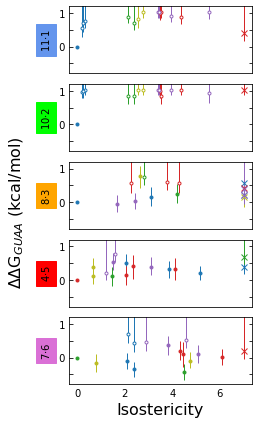

In [23]:
fig,axs = plt.subplots(nrows=5,figsize=(5,6),sharex=True,sharey=True,facecolor='w')

res1s = [11,10,8,4,7]
res2s = [1,2,3,5,6]

for res1,res2,ax,color,iso in zip(res1s,res2s,axs,
                       ['cornflowerblue','lime','orange','red','orchid'],
                                 isostericities.values()):
    nuc1 = sequence_11ntRwt.replace('_','')[revDict(mutation_dict_11ntR)[res1]]
    nuc2 = sequence_11ntRwt.replace('_','')[revDict(mutation_dict_11ntR)[res2]] 
    
    iso = pd.DataFrame(iso,index=['isostericity']).T

    curr_data = pd.DataFrame({
                    f'{res1}_mut':nuc1,
                    f'{res2}_mut':nuc2,
                    'ddG':0,
                    'ddG_lb':0,
                    'ddG_ub':0,
                    'limit':False
                },index=[sequence_11ntRwt])

    temp_df = ddG_GUAA.query(
        '(first_loc == @res1 & (second_loc == @res2 | second_loc.isna()))',engine='python').rename(
        columns={'first_res':f'{res1}_mut','second_res':f'{res2}_mut'})
    temp_df.loc[temp_df['second_loc'].isna(),f'{res2}_mut'] = nuc2
    curr_data = pd.concat((curr_data,temp_df))

    temp_df = ddG_GUAA.query(
        '(first_loc == @res2 & (second_loc == @res1 | second_loc.isna()))',engine='python').rename(
        columns={'first_res':f'{res2}_mut','second_res':f'{res1}_mut'})
    temp_df.loc[temp_df['second_loc'].isna(),f'{res1}_mut'] = nuc1
    curr_data = pd.concat((curr_data,temp_df))
    
    curr_data['bases'] = curr_data[[f'{res1}_mut',f'{res2}_mut']].apply(lambda s: s[0]+s[1], axis=1)
    curr_data['bp'] = assignBP(curr_data['bases'])
    
    curr_data['bases'] = pd.Categorical(curr_data['bases'],base_pairs)    
        
    for bp,bp_color in zip(base_pair_names,base_pair_colors):
        plot_data = curr_data[curr_data['bp']==bp].sort_values('bases')
        
        plot_data = plot_data.merge(iso,left_on='bases',right_index=True,how='left')        
        plot_data['isostericity']=plot_data['isostericity'].fillna(7)
        
        x_data = plot_data['isostericity'].values
        y_data = plot_data['ddG'].values
        y_ub = plot_data['ddG_ub'].values - y_data
        y_lb = y_data - plot_data['ddG_lb'].values
        
        no_isos = plot_data['isostericity'] == 7
        nonlimits = ~ plot_data['limit'] * (~ no_isos)
        limits = plot_data['limit'] * (~ no_isos)
        
        
        ax.errorbar(x_data[nonlimits],y_data[nonlimits],
                   yerr=(y_lb[nonlimits],y_ub[nonlimits]),
                    fmt='.',color=bp_color,
                    elinewidth=1)
        ax.errorbar(x_data[limits],y_data[limits],
                   yerr=(y_lb[limits],[2]*sum(limits)),
                    fmt='.',color=bp_color,
                     elinewidth=1,markerfacecolor='white')
        
        ax.errorbar(x_data[no_isos],y_data[no_isos],
                   yerr=(y_lb[no_isos],[2]*sum(no_isos)),
                    fmt='x',color=bp_color,
                     elinewidth=1)
    
    ax.set_ylim((-.8,1.2))
    
    ax.set_ylabel(f'{res1}$\cdot${res2}',bbox={'ec':color,'fc':color})
    ax.set_xlabel('')
    
    ax.set_yticks([-.5,0,.5,1])
    ax.set_yticklabels(['',' 0','',' 1'])
    ax.tick_params(bottom=False,right=True,direction='in')
    
fig.supylabel(r'$\Delta\Delta$G$_{GUAA}$ (kcal/mol)',fontsize=16)
ax.set_xlabel(r'Isostericity',fontsize=16)



fig.tight_layout()
fig.subplots_adjust(right=0.7)
plt.savefig('Figures/Supplement/GUAA_isostericity_vs_ddG.png',dpi=600)
plt.show()

